In [125]:
import requests
import pandas as pd
from datetime import datetime
import time
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import html
from ftfy import fix_text
# from bs4 import BeautifulSoup
from nltk.util import ngrams
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import Counter

## **Table of contents**  <a class="anchor" id="toc"></a>
### 1. [Data Collection](#first-bullet)   
### 2. [Data Preprocessing](#second-bullet)  
### 3. [Graphical representation of the dataset](#third-bullet)  

# __1. Data Collection <a class="anchor" id="first-bullet"></a>__  
[Table of Contents](#toc)   

I've written a function called `fetch_questions` that's designed to gather questions from Stack Overflow related to Natural Language Processing (NLP) and related areas.

Here's a step-by-step explanation:

1.  **Setting up the API:**
    * I start by defining the base URL for the Stack Exchange API, which is where I'll be requesting the data from.
    * I initialize an empty list called `all_questions` to store all the questions I retrieve.
    * I have a list of tags related to NLP, like 'nlp', 'language-model', 'text-classification', and many more. This list is important because I'll use these tags to filter the questions I want.
    * I define a dictionary called 'params' that contains all the parameters that will be passed to the stackoverflow api. These parameters include:
        * 'page_size': how many questions should be returned per page.
        * 'accepted': only return questions that have accepted answers.
        * 'order': order the returned questions by their creation date.
        * 'sort': sort the returned questions by their creation date.
        * 'site': the site to get the questions from, which is stackoverflow.
        * 'tagged': the tag to filter the questions by.
        * 'key': my api key.
        * 'filter': include the body of the question in the returned data.

2.  **Looping through Pages and Tags:**
    * I use a `while` loop to keep fetching questions until I have at least 30,000 questions.
    * Inside the loop, I set the `page` and `tagged` parameters in my request.
    * I make a request to the Stack Exchange API using the `requests.get()` function.
    * I check if the API request was successful (status code 200). If not, I print an error message and stop.
    * I print out the page number to monitor the progress of the data fetching.
    * I then extract the 'items' from the json response, which are the questions, and append them to the 'all_questions' list.
    * I increse the size variable, that keeps track of how many questions have been added.
    * I add a small delay using `time.sleep(1)` to avoid overwhelming the API.
    * I increment the page number.
    * I check if there are more pages for the current tag. If not, I move to the next tag in the list.
    * If all tags have been processed, the loop stops.

3.  **Returning the Results:**
    * Finally, I return the `all_questions` list, which now contains all the fetched questions.

4.  **Creating a DataFrame:**
    * Outside the function, I call `fetch_questions()` to get the questions.
    * I then convert the list of questions into a Pandas DataFrame for easier data manipulation.

In essence, I'm using the Stack Exchange API to gather a large dataset of NLP-related questions from Stack Overflow, ensuring I only get questions with accepted answers. I'm iterating through multiple pages and tags to gather enough data. Then, I convert this data into a Pandas DataFrame.


In [ ]:

def fetch_questions(pages=200, page_size=30):
    """
    Fetches Stack Overflow questions related to Natural Language Processing (NLP) and related topics using the Stack Exchange API.

    Args:
        pages (int, optional): The maximum number of pages to fetch. Defaults to 200.
        page_size (int, optional): The number of questions to fetch per page. Defaults to 100.
    Returns:
        list: A list of dictionaries, where each dictionary represents a question.
    """

    BASE_URL = "https://api.stackexchange.com/2.3/search/advanced"
    all_questions = []

    tags = ['nlp', 'language-model', 'text-classification', 'word-embedding', 'spacy', 'nltk', 'seq2seq',
            'sentence-similarity', 'named-entity-recognition', 'text-processing', 'text-mining',
            'sentiment-analysis', 'stemming', 'lemmatization', "huggingface-transformers",
            'tokenization', 'lstm', 'chatbot', 'language-detection', 'speech-to-text',
            'text-to-speech', 'gensim', 'deep-learning', 'machine-learning']  # Supplement 'nlp' if needed.

    params = {
        'page_size': 30,  # Number of questions per page from the API.
        'accepted': 'True',  # Fetch only questions with accepted answers.
        'order': 'desc',  # Order results by creation date (newest first).
        'sort': 'creation',  # Sort by creation date.
        'site': 'stackoverflow',  # Stack Overflow site.
        'tagged': 'nlp',  # Initial tag to filter by.
        'key': 'rl_GXP3yYDC5NCfRWViwHuhPwMAZ',  # My API key.
        'filter': 'withbody',  # Include question body in the response.
    }

    page = 1
    cur_tag = 0
    size = 0
    while size < 30000:  # Ensure we collect at least 30,000 questions, even if it requires using multiple related tags.
        params["page"] = page
        params["tagged"] = tags[cur_tag]
        response = requests.get(BASE_URL, params=params)
        if response.status_code != 200:  # Handle API request errors.
            print(f"Error on page {page}: {response.status_code}. Skipping this page.")
            break

        if page % 20 == 1:  # Print progress every 20 pages.
            print(f"Fetching data from {page}-th page of tag {tags[cur_tag]}...")

        data = response.json()
        all_questions.extend(data.get("items", []))
        size += params['page_size']  # Track total questions fetched.
        time.sleep(1)  # Prevent API rate limiting.
        page += 1
        if data["has_more"] == False:  # Move to the next tag if no more pages for the current tag.
            cur_tag += 1
            page = 1
            if cur_tag + 1 > len(tags):
                break
    return all_questions

questions = fetch_questions()
df = pd.DataFrame(questions)

Fetching data from 1-th page of tag nlp...
Fetching data from 21-th page of tag nlp...
Fetching data from 41-th page of tag nlp...
Fetching data from 61-th page of tag nlp...
Fetching data from 81-th page of tag nlp...
Fetching data from 101-th page of tag nlp...
Fetching data from 121-th page of tag nlp...
Fetching data from 141-th page of tag nlp...
Fetching data from 161-th page of tag nlp...
Fetching data from 181-th page of tag nlp...
Fetching data from 201-th page of tag nlp...
Fetching data from 221-th page of tag nlp...
Fetching data from 241-th page of tag nlp...
Fetching data from 261-th page of tag nlp...
Fetching data from 281-th page of tag nlp...
Fetching data from 1-th page of tag language-model...
Fetching data from 1-th page of tag text-classification...
Fetching data from 21-th page of tag text-classification...
Fetching data from 1-th page of tag word-embedding...
Fetching data from 1-th page of tag spacy...
Fetching data from 21-th page of tag spacy...
Fetching data

In [ ]:
df.to_csv("nlp_questions.csv", index = False)

In [ ]:
df.head()

,tags,owner,is_answered,view_count,closed_date,accepted_answer_id,answer_count,score,last_activity_date,creation_date,...,closed_reason,title,body,content_license,last_edit_date,posted_by_collectives,migrated_from,protected_date,community_owned_date,locked_date
0,"[numpy, nlp, dependencies, google-colaboratory...","{'account_id': 8652474, 'reputation': 687, 'us...",True,89,1.743076e+09,79523777,1,0,1742494070,1742481362,...,Duplicate,Trouble getting importing gensim to work in colab,<p>I am trying to import gensim into colab.</p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[python, nlp, large-language-model]","{'account_id': 1230089, 'reputation': 5390, 'u...",True,26,NaN,79501337,1,0,1741708699,1741704631,...,NaN,Store images instead of showing in a server,<p>I am running the code found on this [site][...,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"[python, nlp, spacy, langchain, presidio]","{'account_id': 22369526, 'reputation': 69, 'us...",True,210,NaN,79495969,2,4,1742055531,1741040827,...,NaN,Presidio with Langchain Experimental does not ...,<p>I am using presidio/langchain_experimental ...,CC BY-SA 4.0,1.741330e+09,NaN,NaN,NaN,NaN,NaN
3,"[nlp, opennlp]","{'account_id': 21332, 'reputation': 5495, 'use...",True,32,NaN,79475445,1,1,1740743750,1740240371,...,NaN,OpenNLP POSTaggerME and ChunkerME synergy,<p>I'm trying to use the OpenNLP chunking API ...,CC BY-SA 4.0,1.740586e+09,NaN,NaN,NaN,NaN,NaN
4,"[python, python-3.x, nlp]","{'account_id': 3657839, 'reputation': 1081, 'u...",True,48,NaN,79461281,1,1,1740316677,1739980065,...,NaN,word/ sentence similarities,<p>I am trying to find if a given word/ set of...,CC BY-SA 4.0,1.740151e+09,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29638 entries, 0 to 29637
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tags                   29638 non-null  object 
 1   owner                  29638 non-null  object 
 2   is_answered            29638 non-null  bool   
 3   view_count             29638 non-null  int64  
 4   closed_date            1222 non-null   float64
 5   accepted_answer_id     29638 non-null  int64  
 6   answer_count           29638 non-null  int64  
 7   score                  29638 non-null  int64  
 8   last_activity_date     29638 non-null  int64  
 9   creation_date          29638 non-null  int64  
 10  question_id            29638 non-null  int64  
 11  link                   29638 non-null  object 
 12  closed_reason          1222 non-null   object 
 13  title                  29638 non-null  object 
 14  body                   29638 non-null  object 
 15  co

### There are some posts might have several tags, so that if we retrieve posts data by querying with different tags, there probably are duplicated posts, here I remove duplicated posts by checking if posts' '__link__' are unique

In [ ]:
# df = pd.read_excel("nlp_questions.xlsx", engine="openpyxl")

In [24]:
df_unique = df.drop_duplicates(subset=['link'], keep='first') #remove duplicated posts
df_unique = df_unique.reset_index(drop=True)
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tags                   24776 non-null  object 
 1   owner                  24775 non-null  object 
 2   is_answered            24775 non-null  object 
 3   view_count             24775 non-null  object 
 4   closed_date            1033 non-null   float64
 5   accepted_answer_id     24775 non-null  float64
 6   answer_count           24774 non-null  float64
 7   score                  24775 non-null  float64
 8   last_activity_date     24775 non-null  float64
 9   creation_date          24775 non-null  float64
 10  question_id            24775 non-null  float64
 11  link                   24775 non-null  object 
 12  closed_reason          1033 non-null   object 
 13  title                  24774 non-null  object 
 14  body                   24774 non-null  object 
 15  co

In [ ]:
# df_unique.to_csv('nlp_questions_unique.csv', index = False)

In [25]:
# Drop question with Nan/null question_id and body (because we cannot retrieve its answer if question_id is null, and drop rows with null body because there's barely content for us to implement sentiment analysis)
df_unique = df_unique.dropna(subset=['question_id', 'body'])
df_unique

,tags,owner,is_answered,view_count,closed_date,accepted_answer_id,answer_count,score,last_activity_date,creation_date,...,closed_reason,title,body,content_license,last_edit_date,posted_by_collectives,migrated_from,protected_date,community_owned_date,locked_date
0,"['numpy', 'nlp', 'dependencies', 'google-colab...","{'account_id': 8652474, 'reputation': 687, 'us...",True,89,1.743076e+09,79523777.0,1.0,0.0,1.742494e+09,1.742481e+09,...,Duplicate,Trouble getting importing gensim to work in colab,<p>I am trying to import gensim into colab.</p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['python', 'nlp', 'large-language-model']","{'account_id': 1230089, 'reputation': 5390, 'u...",True,26,NaN,79501337.0,1.0,0.0,1.741709e+09,1.741705e+09,...,NaN,Store images instead of showing in a server,<p>I am running the code found on this [site][...,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"['python', 'nlp', 'spacy', 'langchain', 'presi...","{'account_id': 22369526, 'reputation': 69, 'us...",True,210,NaN,79495969.0,2.0,4.0,1.742056e+09,1.741041e+09,...,NaN,Presidio with Langchain Experimental does not ...,<p>I am using presidio/langchain_experimental ...,CC BY-SA 4.0,1741330413,NaN,NaN,NaN,NaN,NaN
3,"['nlp', 'opennlp']","{'account_id': 21332, 'reputation': 5495, 'use...",True,32,NaN,79475445.0,1.0,1.0,1.740744e+09,1.740240e+09,...,NaN,OpenNLP POSTaggerME and ChunkerME synergy,<p>I'm trying to use the OpenNLP chunking API ...,CC BY-SA 4.0,1740586328,NaN,NaN,NaN,NaN,NaN
4,"['python', 'python-3.x', 'nlp']","{'account_id': 3657839, 'reputation': 1081, 'u...",True,48,NaN,79461281.0,1.0,1.0,1.740317e+09,1.739980e+09,...,NaN,word/ sentence similarities,<p>I am trying to find if a given word/ set of...,CC BY-SA 4.0,1740151158,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,"['python', 'numpy', 'tensorflow', 'deep-learni...","{'account_id': 15718018, 'reputation': 49, 'us...",True,562,NaN,65634693.0,1.0,0.0,1.610131e+09,1.610130e+09,...,NaN,train test split is not splitting correctly,<p>I am still a beginner in AI and deep learni...,CC BY-SA 4.0,1610131142,NaN,NaN,NaN,NaN,NaN
24772,"['machine-learning', 'scikit-learn', 'deep-lea...","{'account_id': 15851108, 'reputation': 42, 'us...",True,5106,NaN,65629414.0,2.0,2.0,1.640657e+09,1.610103e+09,...,NaN,MultinomialNB or GaussianNB or CategoricalNB w...,"<p>Let I have a input feature <code>X = {X1, X...",CC BY-SA 4.0,1610206542,NaN,NaN,NaN,NaN,NaN
24773,"['python', 'deep-learning', 'pytorch', 'conv-n...","{'account_id': 17239237, 'reputation': 17, 'us...",True,607,NaN,65635714.0,1.0,0.0,1.614703e+09,1.610103e+09,...,NaN,Custom small CNN has better accuracy than the ...,<p>I have a dataset of laser welding images of...,CC BY-SA 4.0,1610105061,NaN,NaN,NaN,NaN,NaN
24774,"['deep-learning', 'computer-vision', 'object-d...","{'account_id': 9126690, 'reputation': 406, 'us...",True,462,NaN,65611595.0,1.0,1.0,1.610042e+09,1.610019e+09,...,NaN,Creating a dataset of images for object detect...,<p>Even though I am quite familiar with the co...,CC BY-SA 4.0,1610041831,NaN,NaN,NaN,NaN,NaN


### Querying __accepted__ answers from fetched posts (because original fetched data only contains of only 1 accepted answer per post)

In [26]:
len_ques = len(df_unique['link'].unique()) #check if all questions in this dataframe is unique
print(len_ques)

24774


In [27]:
cols = ['title', 'description', 'tags', 'accepted answer 1', 'accepted answer 2', 'creation date', 'view count', 'score']

In [28]:
#Method to get accepted answers from given question ID(s)
def get_answers_for_question(question_ids):
    url = f"https://api.stackexchange.com/2.3/questions/{question_ids}/answers"
    res = []
    has_more = True
    params = {
        'page_size': 30,
        'order': 'desc',
        'sort': 'votes',
        'site': 'stackoverflow',
        'filter': '!6WPIomp1bTBj5', #is_accepted filter
        'key':'rl_GXP3yYDC5NCfRWViwHuhPwMAZ', # my key :3
    }
    page=0
    # Loop over to get all answers until has_more == False
    while has_more:
        page+=1
        params['page'] = page
        response = requests.get(url, params=params)
        # Update has_more variable
        has_more = response.json().get('has_more', False)
        res.extend(response.json().get('items', []))

    return res




In [42]:

data = []
answers = None
iter = 1  # first iteration

while (iter - 1) * 30 < len_ques:
    try:
        print(f"Iteration {iter}: fetching answer for questions from index {(iter - 1) * 30} to {min(30 * iter, len_ques)}...")

        # Get ID(s) for the current batch, join them with ';'
        questions = df_unique.iloc[(iter - 1) * 30:min(30 * iter, len_ques)]

        # Join all ids together to get answers of at max 30 questions at a time
        ids = ';'.join(list(questions['question_id'].astype(int).astype(str)))

        # Fetch answers for the batch
        answers = get_answers_for_question(ids)

        # Check if API response is valid
        if not answers or not isinstance(answers, list):
            print("Error: Received an invalid response from API. Stopping execution.")
            break

        answers_df = pd.DataFrame(answers)
        answers_df["question_id"] = answers_df["question_id"].astype(str)

        for i in range(len(questions)):
            ans = answers_df[answers_df['question_id'] == str(int(questions.iloc[i]['question_id']))]

            accepted_ans_1, accepted_ans_2 = None, None

            for idx, a in ans.iterrows():
                if accepted_ans_1 and accepted_ans_2:
                    break
                if not accepted_ans_1:
                    accepted_ans_1 = a['body']
                elif not accepted_ans_2:
                    accepted_ans_2 = a['body']

            data.append([
                questions.iloc[i]['title'], questions.iloc[i]['body'], questions.iloc[i]['tags'],
                accepted_ans_1, accepted_ans_2, questions.iloc[i]['creation_date'],
                questions.iloc[i]['view_count'], questions.iloc[i]['score']
            ])

        iter += 1

        # Sleep to avoid API rate limiting
        time.sleep(1)

    except Exception as e:
        print(f"An error occurred: {e}. Retrying after a short delay...")
        time.sleep(5)  # Wait before retrying
    # break

print("Finished retrieving answers for all questions in our dataset!")



Iteration 1: fetching answer for questions from index 0 to 30...
Iteration 2: fetching answer for questions from index 30 to 60...
Iteration 3: fetching answer for questions from index 60 to 90...
Iteration 4: fetching answer for questions from index 90 to 120...
Iteration 5: fetching answer for questions from index 120 to 150...
Iteration 6: fetching answer for questions from index 150 to 180...
Iteration 7: fetching answer for questions from index 180 to 210...
Iteration 8: fetching answer for questions from index 210 to 240...
Iteration 9: fetching answer for questions from index 240 to 270...
Iteration 10: fetching answer for questions from index 270 to 300...
Iteration 11: fetching answer for questions from index 300 to 330...
Iteration 12: fetching answer for questions from index 330 to 360...
Iteration 13: fetching answer for questions from index 360 to 390...
Iteration 14: fetching answer for questions from index 390 to 420...
Iteration 15: fetching answer for questions from in

My dataset retrieved from StackExchange APIs has 24774 rows with 8 columns   
8 columns in the dataset include:

1.  **`title`**: The title of the Stack Overflow question.
2.  **`description`**: The body/content of the question, likely containing details, code snippets, and formatting (as indicated by the `<p>` tags).
3.  **`tags`**: A list of tags associated with the question on Stack Overflow, useful for categorization (e.g., 'python', 'nlp', 'spacy', 'deep-learning', 'tensorflow').
4.  **`accepted_answer_1`**: Contains the body text of the first answer retrieved for the question (likely the highest-voted answer based on typical API usage). It may be `None` if no answer was found or processed.
5.  **`accepted_answer_2`**: Contains the body text of the second answer retrieved (likely the second highest-voted). Also may be `None`.
6.  **`creation_date`**: The timestamp indicating when the question was originally posted (appears to be in Unix epoch format).
7.  **`view_count`**: The number of times the question has been viewed on Stack Overflow.
8.  **`score`**: The score (net upvotes/downvotes) of the question on Stack Overflow.


In [59]:
df_ans = pd.DataFrame(data, columns = cols)
df_ans

,title,description,tags,accepted answer 1,accepted answer 2,creation date,view count,score
0,Trouble getting importing gensim to work in colab,<p>I am trying to import gensim into colab.</p...,"['numpy', 'nlp', 'dependencies', 'google-colab...",<p>You have to restart the session for the und...,None,1.742481e+09,89,0.0
1,Store images instead of showing in a server,<p>I am running the code found on this [site][...,"['python', 'nlp', 'large-language-model']",<p>I can't test it but ...</p>\n<p>I checked <...,None,1.741705e+09,26,0.0
2,Presidio with Langchain Experimental does not ...,<p>I am using presidio/langchain_experimental ...,"['python', 'nlp', 'spacy', 'langchain', 'presi...",<p>Presidio allows configuring the Analyzer (a...,<p>After some test I was able to find the solu...,1.741041e+09,210,4.0
3,OpenNLP POSTaggerME and ChunkerME synergy,<p>I'm trying to use the OpenNLP chunking API ...,"['nlp', 'opennlp']","<h2>Q1</h2>\n<p>Yes, the chosen tag set (UD, P...",None,1.740240e+09,32,1.0
4,word/ sentence similarities,<p>I am trying to find if a given word/ set of...,"['python', 'python-3.x', 'nlp']","<p>Yes, it’s definitely doable using NLP! The ...",None,1.739980e+09,48,1.0
...,...,...,...,...,...,...,...,...
24769,train test split is not splitting correctly,<p>I am still a beginner in AI and deep learni...,"['python', 'numpy', 'tensorflow', 'deep-learni...",<p>The <code>110/110</code> you are seeing in ...,None,1.610130e+09,562,0.0
24770,MultinomialNB or GaussianNB or CategoricalNB w...,"<p>Let I have a input feature <code>X = {X1, X...","['machine-learning', 'scikit-learn', 'deep-lea...",<p>Each algorithm of NB expects different type...,<p>Transform your categorial feature X2 using ...,1.610103e+09,5106,2.0
24771,Custom small CNN has better accuracy than the ...,<p>I have a dataset of laser welding images of...,"['python', 'deep-learning', 'pytorch', 'conv-n...",<p><strong>Here is my theory :</strong></p>\n<...,None,1.610103e+09,607,0.0
24772,Creating a dataset of images for object detect...,<p>Even though I am quite familiar with the co...,"['deep-learning', 'computer-vision', 'object-d...","<p>Yes, you will need to do that.</p>\n<p>At t...",None,1.610019e+09,462,1.0


In [ ]:
# df_ans.to_excel("ques_ans.xlsx", index = False)

In [62]:
df_ans = pd.read_excel("ques_ans.xlsx", engine="openpyxl")

# **2. Pre-processing**   <a class="anchor" id="second-bullet"></a>  
[Table of Contents](#toc)   
Perform some pre-processing on each column of the dataset. For example, remove the punctuation marks, special symbols, convert to lower case, remove screenshots from the posts and answers, tokenization etc.

### __2.1 [Fix Encoding Issues](#bullet21)__  
### __2.2 [Pre-process data](#bullet22)__  (Remove HTML tags, remove code blocks, lowercasing, remove special characters & numbers, tokenization, remove Stopwords, handling technical terms (e.g., module names, libraries, etc))


#### __2.1 Fix Encoding Issues <a class="anchor" id="bullet21"></a>__  ([Go back to 2. Preprocessing](#second-bullet)) 
(During preliminary analysis, I discovered several encoding issues in the fetched dataset that require handling before proceeding with further processing. Special characters and diacritical marks appear as garbled text (like "â€œ" instead of quotation marks or "Ã©" instead of "é"), indicating a character encoding mismatch between the source data and our processing environment. These inconsistencies could potentially affect text searching, sentiment analysis, and other natural language processing tasks. I'll need to implement appropriate encoding conversion functions to ensure all text is properly normalized to UTF-8 before conducting any meaningful analysis on the dataset.)  

In [64]:
def detect_encoding_issues(df_ans):
    mask = df_ans.applymap(lambda x: isinstance(x, str) and any(ord(char) > 127 for char in x))
    corrupted_rows = df_ans[mask.any(axis=1)]
    return corrupted_rows
corrupted_rows = detect_encoding_issues(df_ans)
print(corrupted_rows)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27252\4048267712.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df_ans.applymap(lambda x: isinstance(x, str) and any(ord(char) > 127 for char in x))


                                                   title  \
0      Trouble getting importing gensim to work in colab   
3              OpenNLP POSTaggerME and ChunkerME synergy   
4                            word/ sentence similarities   
6                           Can&#39;t compile Marian NMT   
16     Using an AWS service to execute a python scrip...   
...                                                  ...   
24745             Run tensorflow on linux by python3 pip   
24747  Which parameters of Mask-RCNN control mask rec...   
24758  Keras Data Augmentation with ImageDataGenerato...   
24761  Crossentropyloss Pytorch: Targetsize does not ...   
24770  MultinomialNB or GaussianNB or CategoricalNB w...   

                                             description  \
0      <p>I am trying to import gensim into colab.</p...   
3      <p>I'm trying to use the OpenNLP chunking API ...   
4      <p>I am trying to find if a given word/ set of...   
6      <p>I'm using endeavouros. I'm tr

Below is how a row with encoding error looks like, it has some characters which are non-ASCII, so I will write a function to handle this

In [65]:
for i in corrupted_rows.iloc[1]:
    print(i)

OpenNLP POSTaggerME and ChunkerME synergy
<p>I'm trying to use the OpenNLP chunking API to chunk a portuguese sentence. So, first I tokenized a sentence using <a href="https://opennlp.apache.org/docs/2.5.3/manual/opennlp.html#tools.tokenizer.api" rel="nofollow noreferrer">TokenizerME</a>, then I tagged it with <a href="https://opennlp.apache.org/docs/2.5.3/manual/opennlp.html#tools.postagger.tagging.api" rel="nofollow noreferrer">POSTaggerME</a>. For both I used the ready-made models provided by the project <a href="https://opennlp.apache.org/models.html" rel="nofollow noreferrer">here</a>.</p>
<p>For the sentence â€œIvo viu a uvaâ€, POSTaggerME returns the tags [PROPN, VERB, DET, NOUN]. The model seems to be using the <a href="https://universaldependencies.org/u/pos/" rel="nofollow noreferrer">UD POS Tags</a>.</p>
<p>As there is no ready-made model for ChunkerME in portuguese, I <a href="https://opennlp.apache.org/docs/2.5.3/manual/opennlp.html#tools.corpora.arvores-deitadas" rel="no

#### The function fix_encoding(text) below corrects misencoded text using ftfy, decodes HTML entities, and removes all non-ASCII characters. For example, calling fix_encoding("â€˜< >â€") will return "< >", stripping out problematic encoding artifacts while keeping standard ASCII characters.

In [66]:
def fix_encoding(text):
    """Fixes encoding issues, removes unwanted artifacts, and decodes HTML entities."""
    if isinstance(text, str):
        text = fix_text(text)  # Fixes misencoded text
        text = html.unescape(text)  # Decodes HTML entities (e.g., &lt; → <)

        text = re.sub(r"[^\x00-\x7F]+", "", text)  # Remove all non-ASCII characters
        return text.strip()

    return text
fix_encoding( "â€˜< >â€" )

"'< >"

In [67]:
df_fixencoding = df_ans.applymap(fix_encoding)
df_fixencoding.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27252\3756384132.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_fixencoding = df_ans.applymap(fix_encoding)


,title,description,tags,accepted answer 1,accepted answer 2,creation date,view count,score
0,Trouble getting importing gensim to work in colab,<p>I am trying to import gensim into colab.</p...,"['numpy', 'nlp', 'dependencies', 'google-colab...",<p>You have to restart the session for the und...,NaN,1742481362,89,0
1,Store images instead of showing in a server,<p>I am running the code found on this [site][...,"['python', 'nlp', 'large-language-model']",<p>I can't test it but ...</p>\n<p>I checked <...,NaN,1741704631,26,0
2,Presidio with Langchain Experimental does not ...,<p>I am using presidio/langchain_experimental ...,"['python', 'nlp', 'spacy', 'langchain', 'presi...",<p>Presidio allows configuring the Analyzer (a...,<p>After some test I was able to find the solu...,1741040827,210,4
3,OpenNLP POSTaggerME and ChunkerME synergy,<p>I'm trying to use the OpenNLP chunking API ...,"['nlp', 'opennlp']","<h2>Q1</h2>\n<p>Yes, the chosen tag set (UD, P...",NaN,1740240371,32,1
4,word/ sentence similarities,<p>I am trying to find if a given word/ set of...,"['python', 'python-3.x', 'nlp']","<p>Yes, it's definitely doable using NLP! The ...",NaN,1739980065,48,1


In [68]:
_ =detect_encoding_issues(df_fixencoding)
if _.empty:
    print("No encoding issues detected in the dataset.")
else:
    print("Encoding issues found:", _)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27252\4048267712.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df_ans.applymap(lambda x: isinstance(x, str) and any(ord(char) > 127 for char in x))


No encoding issues detected in the dataset.


In [69]:
print(df_fixencoding.iloc[0]['description'])

<p>I am trying to import gensim into colab.</p>
<pre><code>!pip install gensim
</code></pre>
<p>I get the following error:</p>
<pre><code>/usr/local/lib/python3.11/dist-packages/numpy/__init__.py in __getattr__(attr)
    365                 raise AssertionError()
    366         except AssertionError:
--> 367             msg = ("The current Numpy installation ({!r}) fails to "
    368                    "pass simple sanity checks. This can be caused for example "
    369                    "by incorrect BLAS library being linked in, or by mixing "

ModuleNotFoundError: No module named 'numpy.char'
</code></pre>
<p>my numpy version is 2.02. If I downgrade numpy to another version like say 1.26.4 I get a different error but always a numpy string related issue. Thanks</p>


In [70]:
df_fixencoding

,title,description,tags,accepted answer 1,accepted answer 2,creation date,view count,score
0,Trouble getting importing gensim to work in colab,<p>I am trying to import gensim into colab.</p...,"['numpy', 'nlp', 'dependencies', 'google-colab...",<p>You have to restart the session for the und...,NaN,1742481362,89,0
1,Store images instead of showing in a server,<p>I am running the code found on this [site][...,"['python', 'nlp', 'large-language-model']",<p>I can't test it but ...</p>\n<p>I checked <...,NaN,1741704631,26,0
2,Presidio with Langchain Experimental does not ...,<p>I am using presidio/langchain_experimental ...,"['python', 'nlp', 'spacy', 'langchain', 'presi...",<p>Presidio allows configuring the Analyzer (a...,<p>After some test I was able to find the solu...,1741040827,210,4
3,OpenNLP POSTaggerME and ChunkerME synergy,<p>I'm trying to use the OpenNLP chunking API ...,"['nlp', 'opennlp']","<h2>Q1</h2>\n<p>Yes, the chosen tag set (UD, P...",NaN,1740240371,32,1
4,word/ sentence similarities,<p>I am trying to find if a given word/ set of...,"['python', 'python-3.x', 'nlp']","<p>Yes, it's definitely doable using NLP! The ...",NaN,1739980065,48,1
...,...,...,...,...,...,...,...,...
24769,train test split is not splitting correctly,<p>I am still a beginner in AI and deep learni...,"['python', 'numpy', 'tensorflow', 'deep-learni...",<p>The <code>110/110</code> you are seeing in ...,NaN,1610130256,562,0
24770,MultinomialNB or GaussianNB or CategoricalNB w...,"<p>Let I have a input feature <code>X = {X1, X...","['machine-learning', 'scikit-learn', 'deep-lea...",<p>Each algorithm of NB expects different type...,<p>Transform your categorial feature X2 using ...,1610103359,5106,2
24771,Custom small CNN has better accuracy than the ...,<p>I have a dataset of laser welding images of...,"['python', 'deep-learning', 'pytorch', 'conv-n...",<p><strong>Here is my theory :</strong></p>\n<...,NaN,1610102996,607,0
24772,Creating a dataset of images for object detect...,<p>Even though I am quite familiar with the co...,"['deep-learning', 'computer-vision', 'object-d...","<p>Yes, you will need to do that.</p>\n<p>At t...",NaN,1610018959,462,1


#### __NLTK Resource Downloads__
* NLTK requires specific data resources (models, corpora) for its functions to work. This code ensures two essential resources are downloaded:
    * **`'punkt'`**: Contains pre-trained models that `word_tokenize` uses to intelligently split text into sentences and words, handling punctuation correctly.
    * **`'stopwords'`**: Contains lists of common stopwords for various languages, including English, used by `stopwords.words('english')`.
* These downloads typically only need to run once per environment. If the resources are already present, NLTK usually skips the download.



In [9]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### __2.2 Pre-process data <a class="anchor" id="bullet22"></a>__  ([Go back to 2. Preprocessing](#second-bullet))  
The preprocessing steps I mentioned above are essential for improving the quality of the input text for my text categorization task. Let me explain why each of these steps is important:

##### **Remove Image References**  
In most text categorization tasks, the model is concerned with understanding the content of the text itself, such as the meaning, intent, or topic. Image references usually don’t carry any useful semantic information that helps the model understand the text.


##### **Remove Code Blocks**
Code snippets or technical commands (e.g., `!pip install gensim`) typically don’t provide useful information for most text categorization tasks, unless we r categorizing code errors or issues. Removing code blocks focuses the model on understanding the general problem or context rather than trying to analyze code, which may not be necessary for categorization.  


##### **Remove HTML Tags**
HTML tags (`<p>`, `<pre>`, `<code>`, etc.) are used to format text on a webpage but do not provide meaningful information for text analysis. If left in the text, they can create noise and confuse my model. Removing HTML tags ensures that only the actual content (like the error message or description) is passed to the model for analysis. 

##### **Lowercasing**  
Text is often case-sensitive, but for most text categorization tasks, capitalization doesn't add meaning (e.g., "Python" and "python" should be considered the same word). Converting all text to lowercase ensures consistency and prevents the model from treating variations in capitalization as different terms.

##### **Remove Special Characters & Numbers**
Special characters (like `/`, `->`, `:`) and numbers often don’t add value in general text classification. For instance, a version number like `2.02` might be irrelevant in categorizing the error type. Removing or filtering out these elements helps the model focus on the actual words and meanings. For example, the word "numpy" is more important for categorization than a version number.

##### **Tokenization**  
Tokenization breaks text into smaller pieces (usually words or phrases), making it easier for a machine learning model to analyze the structure of the text. It helps us to analyze word frequency, relationships, and other features.  

##### **Remove Stopwords**
Stopwords are common words (e.g., "the", "is", "and", "in") that don't carry significant meaning in most text categorization tasks. Keeping them in the data can reduce the effectiveness of the model, especially when working with large datasets. By removing stopwords, I can eliminate unnecessary noise and make the model focus on the more meaningful words in the text. This is particularly important for tasks like sentiment analysis or topic categorization, where stopwords don't contribute to the outcome.  

##### **Handling Technical Terms (e.g., module names)**
Terms related to specific technologies, such as "numpy", "gensim", or "colab", can be important in technical text categorization tasks. These terms are keywords or labels that can help the model identify specific types of content or errors.  

##### **Reasons why data pre processing is important:**
- **Consistency**: ensure uniformity in the data by lowercasing, removing punctuation, and handling variations in format.
- **Noise Reduction**: by removing irrelevant content (HTML tags, code, stopwords), we can reduce the distractions for the model and focus on meaningful information.
- **Feature Extraction**: Tokenization and handling special terms help extract relevant features from the text that can be used by my model to make accurate predictions.
- **Improved Model Performance**: Properly preprocessed text is cleaner and more structured, helping my machine learning model to better understand the data and improve classification accuracy.

In short, preprocessing is about making the text model-friendly by simplifying, cleaning, and standardizing it. This results in better input for the machine learning model, leading to improved accuracy and more meaningful results from my categorization task.
  
------------------------------------

**`detect_and_remove_image_references(text)` Function:**

```python
def detect_and_remove_image_references(text):
    # ... (function body) ...
    return text
```

* **Purpose**: Specifically targets and removes text patterns that commonly refer to images or screenshots within the posts (e.g., "see screenshot below", "[image]"). This doesn't remove actual image *files*, just the textual references.
* **Input Check**: Similar check for string type.
* **Regex Removals**: Uses `re.sub` with specific patterns:
    * `r'screenshot\s+\w+'`: Removes "screenshot" followed by whitespace and another word (e.g., "screenshot below", "screenshot attached").
    * `r'image\s+\w+'`: Removes "image" followed by whitespace and another word (e.g., "image link", "image here").
    * `r'\[image\]|\[screenshot\]'`: Removes literal "[image]" or "[screenshot]".
    * `flags=re.IGNORECASE`: Makes the matching case-insensitive, so it catches "Screenshot", "screenshot", "IMAGE", etc.
* **Return Value**: Returns the text string with these specific references removed.

In [93]:
def detect_and_remove_image_references(text):

    """
     Detect and remove image/screenshot references in text
     """
    if not isinstance(text, str):
         return ""
     # Remove patterns that likely refer to images or screenshots
    text = re.sub(r'screenshot\s+\w+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'image\s+\w+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\[image\]|\[screenshot\]', '', text, flags=re.IGNORECASE)
    return text

In [ ]:
def preprocess_text(text):
    """
    Preprocess text by:
    1. Remove code blocks
    2. Remove HTML tags
    3. Convert to lowercase
    4. Remove URLs
    5. Remove punctuation and special characters
    6. Remove numbers
    7. Remove extra whitespace
    """
    if not isinstance(text, str):
        return ""

    # Remove inline code (if needed)
    text = re.sub(r'`.*?`', '', text)  # Remove inline code

    # Remove block code (example: <pre><code>...</code></pre>)
    text = re.sub(r'<pre><code>.*?</code></pre>', '', text, flags=re.DOTALL)
    
    # Remove comments and doctype
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)  # Remove HTML comments
    text = re.sub(r'<!DOCTYPE.*?>', '', text)  # Remove doctype declarations

    # Ensure proper encoding and handle special characters
    text = text.encode('utf-8', 'ignore').decode('utf-8')

    # Remove HTML tags

    text = re.sub(r'<.*?>', '', text)

    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text



In [103]:
def tokenize_text(text):

    """
    Tokenize text into individual words and remove stopwords
    """
    if not isinstance(text, str) or not text:
        return []
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens



In [104]:


def preprocess_excel_file(df, target = 'ques_ans_processed.xlsx'):
    """
    Read and preprocess an Excel file with questions and answers
    """
    # Read the Excel file
    # df = pd.read_excel(file_path)
    # Display the original data structure
    print("Original Data Structure:")
    print(df.info())
    print("\nSample of original data:")
    print(df.head())
    # Make a copy of the dataframe for preprocessing
    processed_df = df.copy()
    # Preprocess each text column in the dataframe
    text_columns = df.select_dtypes(include=['object']).columns
    for column in text_columns:
        # Apply image reference removal
        processed_df[column] = df[column].apply(detect_and_remove_image_references)
        # Apply text preprocessing
        processed_df[column] = processed_df[column].apply(preprocess_text)
        # Create new tokenized columns (used to store tokens for each column of each row)
        processed_df[f'{column}_tokens'] = processed_df[column].apply(tokenize_text)
        # Count tokens ( count #tokens of each column of each row )
        processed_df[f'{column}_token_count'] = processed_df[f'{column}_tokens'].apply(len)


    # Calculate descriptive statistics for token counts
    print("\nToken Count Statistics:")
    for column in text_columns:
        token_col = f'{column}_token_count'
        if token_col in processed_df.columns:
            print(f"\n{column} Token Count:")
        print(processed_df[token_col].describe())

    # Display sample of processed data
    print("\nSample of processed data:")
    print(processed_df.head())

    # Save the processed dataframe to a new file
    # output_file = file_path.replace('.xlsx', '_processed.xlsx')
    processed_df.to_excel(target, index=False)
    print(f"\nProcessed data saved to {target}")


    return processed_df

In [ ]:
processed_data = preprocess_excel_file(df_fixencoding)

In [108]:
processed_data.head()

,title,description,tags,accepted answer 1,accepted answer 2,creation date,view count,score,title_tokens,title_token_count,description_tokens,description_token_count,tags_tokens,tags_token_count,accepted answer 1_tokens,accepted answer 1_token_count,accepted answer 2_tokens,accepted answer 2_token_count
0,trouble getting importing gensim to work in colab,i am trying to import gensim into colab i get ...,numpy nlp dependencies googlecolaboratory gensim,you have to restart the session for the underl...,,1742481362,89,0,"[trouble, getting, importing, gensim, work, co...",6,"[trying, import, gensim, colab, get, following...",24,"[numpy, nlp, dependencies, googlecolaboratory,...",5,"[restart, session, underlying, runtime, notice...",53,[],0
1,store images instead of showing in a server,i am running the code found on this site in my...,python nlp largelanguagemodel,i cant test it but i checked source code and i...,,1741704631,26,0,"[store, images, instead, showing, server]",5,"[running, code, found, site, server, would, li...",28,"[python, nlp, largelanguagemodel]",3,"[cant, test, checked, source, code, uses, matp...",24,[],0
2,presidio with langchain experimental does not ...,i am using presidiolangchainexperimental to an...,python nlp spacy langchain presidio,presidio allows configuring the analyzer and n...,after some test i was able to find the solutio...,1741040827,210,4,"[presidio, langchain, experimental, detect, po...",6,"[using, presidiolangchainexperimental, anonymi...",66,"[python, nlp, spacy, langchain, presidio]",5,"[presidio, allows, configuring, analyzer, nlp,...",32,"[test, able, find, solution, output, look, lik...",49
3,opennlp postaggerme and chunkerme synergy,im trying to use the opennlp chunking api to c...,nlp opennlp,q yes the chosen tag set ud penn custom has an...,,1740240371,32,1,"[opennlp, postaggerme, chunkerme, synergy]",4,"[im, trying, use, opennlp, chunking, api, chun...",141,"[nlp, opennlp]",2,"[q, yes, chosen, tag, set, ud, penn, custom, i...",90,[],0
4,word sentence similarities,i am trying to find if a given word set of wor...,python pythonx nlp,yes its definitely doable using nlp the key he...,,1739980065,48,1,"[word, sentence, similarities]",3,"[trying, find, given, word, set, words, simila...",33,"[python, pythonx, nlp]",3,"[yes, definitely, doable, using, nlp, key, don...",72,[],0


In [112]:

# Additional analysis: Vocabulary size per column
text_columns = processed_data.select_dtypes(include=['object']).columns
for column in text_columns:
    if f'{column}_tokens' in processed_data.columns:
    # Calculate vocabulary size (unique tokens)
        all_tokens = [token for token_list in processed_data[f'{column}_tokens'] if isinstance(token_list, list) for token in token_list]
        unique_tokens = set(all_tokens)
        print(f"\n{column} vocabulary size: {len(unique_tokens)}")



# Show most common words (top 20)

        from collections import Counter

        word_counts = Counter(all_tokens)

        print(f"\nTop 20 most common words in {column}:")

        for word, count in word_counts.most_common(20):

            print(f"{word}: {count}")




title vocabulary size: 13204

Top 20 most common words in title:
text: 2787
using: 2506
python: 2467
model: 2079
nltk: 1390
words: 1384
lstm: 1305
error: 1181
spacy: 1177
word: 1106
file: 1061
keras: 1056
data: 1015
speech: 969
list: 930
use: 920
get: 894
input: 800
r: 721
training: 703

description vocabulary size: 79293

Top 20 most common words in description:
using: 13884
model: 13347
code: 13046
like: 12352
im: 11108
text: 10920
want: 9684
use: 9099
get: 9029
data: 8968
would: 8675
error: 8614
words: 8022
file: 7610
output: 7265
trying: 6908
following: 6794
word: 6548
one: 6397
example: 6322

tags vocabulary size: 3449

Top 20 most common words in tags:
python: 12169
nlp: 8508
deeplearning: 3406
nltk: 3308
tensorflow: 2736
machinelearning: 2685
keras: 2499
lstm: 2147
spacy: 1751
pytorch: 1506
pythonx: 1460
texttospeech: 1449
chatbot: 1374
textprocessing: 1247
r: 1235
textmining: 1181
gensim: 1109
huggingfacetransformers: 1053
java: 986
pandas: 866

accepted answer 1 vocabulary si

#### __Discussion about the most common words in my dataset above:__  

## Common Patterns Across All Columns

It is observable that there is a consistent appearance of certain words across all columns (title, description, tags, and answers):

1. **Meta-language dominates the content**: Words like "use", "using", "model", "code", "like", "want", "get" appear frequently in all columns. These are procedural words that describe how to approach problems rather than the problems themselves.

2. **Programming terminology**: Words like "python", "file", "data", "input", "output" reflect the programming-centric nature of the content.

3. **NLP-specific terms**: Words like "text", "words", "word" appear consistently, which makes sense given this is an __NLP-focused dataset__.

## Differences Between Columns

Despite the similarities, there are important differences between the columns:

### Tags
- **Most informative component**: The tags contain the cleanest, most domain-specific terminology
- **Technical frameworks dominate**: "python", "nlp", "deeplearning", "nltk", "tensorflow", "keras", "spacy", "pytorch"
- **Task-specific terms**: "texttospeech", "chatbot", "textprocessing", "textmining"
- **Lowest vocabulary size** (3,449), which makes sense as tags are controlled vocabulary

### Titles
- **More concise and focused** than descriptions
- **Directly state the problem domain**: "text", "python", "nltk", "words", "lstm", "spacy"
- **Error-related terminology**: "error" ranks high (8th), suggesting many questions are about troubleshooting
- **Moderate vocabulary size** (13,204), reflecting the concise nature of titles

### Descriptions
- **Narrative language**: Contains more first-person expressions ("im", "trying", "want") 
- **Largest vocabulary size** (79,293), reflecting the free-form, detailed nature of problem descriptions
- **Context-setting words**: "following", "example", "trying" used to set up the problem scenario

### Accepted answers (1 and 2)
- **Solution-oriented language**: "use", "model", "using", "need", "code", "example"
- **First answers vs. second answers**: Second answers have significantly smaller vocabulary (26,926 vs. 76,150), suggesting they're often shorter or more focused

## Conclusion from this basic data preprocessing pipeline

1. **Standard stopword lists are insufficient**: Generic English stopwords don't capture the domain-specific "stopwords" in technical discussions (like "use", "model", "using"). 

2. **N-grams would be more informative**: Single words don't capture meaningful technical concepts well. Phrases like "word embeddings", "language model", or "neural network" would be more revealing.

3. **Tag information is valuable**: The tags contain the clearest signal about the domain topics. They could be used to guide topic modeling or classification.

4. **Different sections serve different purposes**: 
   - Titles identify the problem
   - Descriptions explain the context and attempts
   - Answers provide solutions and explanations

5. **Technical vocabulary vs. meta-language**: There's a clear separation between domain-specific technical terms (more prevalent in tags) and procedural language about how to solve problems (more prevalent in answers).

## Next Steps: Advanced data preprocessing pipeline  
#### __What This Pipeline Does__

__Processes All Text Columns:__  

- Titles (concise problem statements)  
- Descriptions (detailed problem explanations)  
- Tags (domain-specific categorization)  
- Accepted answers (solution discussions)  


__For Each Column:__  

- Extracts tokens from string representation
- Applies spaCy lemmatization
- Removes technical stopwords and short tokens
- Extracts meaningful bigrams
- Calculates TF-IDF scores for importance weighting
- Boosts terms that appear in top tags
- Further boosts key NLP-specific terminology
- Generates word clouds with advanced weighting


__Creates Visualizations:__  

- A combined visualization showing word clouds for all columns
- Individual word clouds saved as separate files
- Text files listing the top terms for each column  





-------------------------

## Lemmatization vs. Stemming <a class="anchor" id="lemmatization"></a>

### Why lemmatization is better __in this case__:

1. **Preserves technical meaning**: Lemmatization reduces words to their dictionary base forms while preserving their semantic meaning. For technical terms like "tokenization"-> "tokenize" or "embeddings" -> "embedding", this maintains the proper technical term rather than creating potentially invalid stems.

2. **More readable results**: My word cloud will contain actual words rather than truncated stems, making it easier to interpret. For example, stemming might reduce "training" to "train" but could also reduce "transformer" to "transform" (losing the specific technical meaning). I'm creating a visualization where term readability matters

3. **Better for domain-specific terminology**: NLP has many specialized terms where the exact form matters. Lemmatization respects these domain-specific nuances better than stemming.

### When stemming could be considered (not this case):

1. **Processing speed**: If you're working with a very large dataset and performance is crucial, stemming is faster than lemmatization.

2. **Simplicity**: Stemming doesn't require POS tagging and is easier to implement.

3. **Recall-oriented tasks**: For some information retrieval tasks, stemming's aggressive reduction can be helpful.   

------------------------




In [ ]:
nlp = spacy.load('en_core_web_sm') #Load spacy model for lemmatization
# Function to lemmatize text using spacy
def lemmatize_with_spacy(tokens):
    """Lemmatize a list of tokens using spacy"""
    if not tokens:
        return []
    
    # Join tokens for spacy processing
    text = ' '.join(tokens)
    # Process with spacy
    doc = nlp(text)
    # Extract lemmas
    #len(token.lemma_) > 2 in the list comprehension is used to filter out words that are very short in length 
    lemmas = [token.lemma_ for token in doc if len(token.lemma_) > 2]
    return lemmas

In [213]:
#Function to extract tokens from the dataset's token string format
def extracting_tokens(token_str):
    """Extract tokens from the string representation in the dataset"""
    # print('111',token_str)
    if not isinstance(token_str, str):
        return token_str #if not str then it probably can be a list
    
    # Extract content inside square brackets
    match = re.search(r'\[(.*)\]', token_str)
    # print('1')
    if not match:
        # print('2')
        return []
    
    # Clean and extract tokens
    tokens = []
    for token in match.group(1).split(','):
        # Remove quotes and whitespace
        cleaned = token.strip().strip('\'"')
        if cleaned:
            tokens.append(cleaned)
    # print('hehe',tokens)
    # print('3')
    return tokens

-------------------------

## Develop a custom stopword list <a class="anchor" id="rmstopwords"></a>

In [214]:
#Define custom stopwords for technical/programming discussions
technical_stopwords = {
    # Meta-language about coding
    'use', 'using', 'used', 'create', 'make', 'implement', 'build', 'develop',
    'call', 'run', 'execute', 'start', 'stop', 'work', 'working', 'function',
    
    # Common programming terms when used alone
    'code', 'data', 'file', 'files', 'list', 'array', 'set', 'dict', 'string', 
    'integer', 'float', 'class', 'object', 'method', 'function', 'value', 'key',
    
    # Common operations
    'get', 'set', 'add', 'remove', 'delete', 'update', 'create', 'generate',
    'find', 'search', 'match', 'replace', 'convert', 'change', 'modify',
    
    # Programming discourse terms
    'error', 'issue', 'problem', 'bug', 'fix', 'solution', 'approach', 'way',
    'example', 'sample', 'test', 'case', 'question', 'help', 'need', 'want',
    
    # Technical modifiers
    'different', 'multiple', 'single', 'many', 'few', 'large', 'small',
    
    # Time and sequence terms
    'first', 'second', 'last', 'before', 'after', 'during', 'time',
    
    # Common programming filler words
    'trying', 'tried', 'try', 'want', 'need', 'would', 'could', 'should', 'can',
    
    # Additional common words in your dataset
    'like', 'one', 'im', 'following', 'look', 'looking', 'output', 'input',
    'text', 'new', 'know', 'return', 'also', 'please', 'thanks', 'done'
}

In [215]:
# process tokens with lemmatization and stopword removal
def process_tokens(token_str):
    """Process tokens: extract, lemmatize, remove stopwords"""
    # Extract tokens from dataset(pd.DataFrame)
    tokens = extracting_tokens(token_str)
    
    # Apply lemmatization first
    lemmas = lemmatize_with_spacy(tokens)
    
    # Remove stopwords and short words after lemmatization
    filtered = [lemma for lemma in lemmas if lemma.lower() not in technical_stopwords and len(lemma) > 2]
    # print(token_str,tokens, lemmas, filtered)
    return filtered

True

In [216]:
# Calculate TF-IDF and generate word cloud for a column
def process_column(df, column_name):
    """Process a column and generate word cloud with advanced weighting"""
    token_column = f"{column_name}_tokens"
    if token_column not in df.columns:
        # print(f"Column {token_column} not found in dataframe")
        return None, None
    
    # Process all entries in the column
    processed_tokens = []
    docs = []  # For TF-IDF

    for tokens_str in df[token_column].dropna(): # Drop all n/a records of a specific column in df
        # Process tokens with lemmatization and stopword removal
        processed = process_tokens(tokens_str) # convert stored tokens into array
        processed_tokens.extend(processed) #concatenate
        docs.append(' '.join(processed)) #use for TF-IDF later on
        # print(processed)
    # Extract bigrams from processed tokens
    bigrams = list(ngrams(processed_tokens, 2))
    bigram_counts = Counter(bigrams)
    # Convert bigrams to strings for word cloud
    bigram_dict = {f"{b[0]}_{b[1]}": count for b, count in bigram_counts.items() if count > 5}
    
    # Calculate TF-IDF scores (which words are important to a specific doc)
    vectorizer = TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=5,
        max_df=0.5
    )
    if len(docs) == 0:
        return None, None
    
    
    
    tfidf_matrix = vectorizer.fit_transform(docs)

    #This method retrieves the list of feature names (i.e., words) that are considered by the vectorizer after it has been fitted. This list corresponds to the columns in the TF-IDF matrix.
    feature_names = vectorizer.get_feature_names_out()

    # This operation sums up the TF-IDF values column-wise in the matrix (it sums the TF-IDF values for each term across all documents). 
    # This results in an array where each entry represents the total TF-IDF score for each word across all documents in the corpus.
    tfidf_sums = tfidf_matrix.sum(axis=0).A1

    #create a dictionary where the keys are the feature names, and the values are the corresponding sum of the TF-IDF scores
    tfidf_scores = {feature_names[i]: tfidf_sums[i] for i in range(len(feature_names))}
    
    # ===========================================================
    # Extract tag information
    tag_counts = Counter()
    for tags in df['tags'].dropna():
        for tag in tags.split(' '):
            tag_counts[tag] += 1
    top_tags = {tag for tag, count in tag_counts.most_common(50)}
    #++++++++++++++++++++++++++++++++++
    # CALCULATE FINAL SCORES ^_^
    #++++++++++++++++++++++++++++++++++
    # Combine all information into final scores
    final_scores = {}
    
    # 1. Start with lemmatized token frequencies
    lemma_counts = Counter(processed_tokens)
    for lemma, count in lemma_counts.items():
        final_scores[lemma] = count
    
    # Add bigrams with boosting
    for bigram, count in bigram_dict.items():
        final_scores[bigram] = count * 1.5  # Weight bigrams higher
    
    # Incorporate TF-IDF scores
    for term, score in tfidf_scores.items():
        if term in final_scores:
            final_scores[term] = final_scores[term] * (1 + score)  # Boost by TF-IDF
        else:
            final_scores[term] = score * 10  # Scale TF-IDF scores
    
    # Boost terms that are also top tags
    for term in final_scores:
        if term in top_tags:
            final_scores[term] *= 2.0  # Double weight for TOP tag terms
        
        # Boost important NLP-specific terms
        if term in {'nlp', 'python', 'spacy', 'bert', 'huggingface', 'transformers', 
                   'embedding', 'tokenize', 'language_model', 'machine_learning'}:
            final_scores[term] *= 1.5
    
    # Get the top terms
    top_terms = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)[:50]
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color='white',
        max_words=100,
        colormap='viridis',
        contour_width=1,
        contour_color='steelblue',
        relative_scaling=0.7,
        prefer_horizontal=0.9
    ).generate_from_frequencies(final_scores)
    
    return wordcloud, top_terms

In [ ]:
# processed_data
# match = re.search(r'\[(.*)\]', "['trouble', 'getting', 'importing', 'gensim', 'work', 'colab']")
# tokens = []
# for token in match.group(1).split(','):
#     # Remove quotes and whitespace
#     cleaned = token.strip().strip('\'"')
#     if cleaned:
#         tokens.append(cleaned)
# tokens

['trouble', 'getting', 'importing', 'gensim', 'work', 'colab']

Processing title...
Top 10 terms in title:
  python: 4426481.28
  word: 1390774.30
  spacy: 1187978.88
  model: 1139176.76
  nltk: 1113633.19
  lstm: 916227.55
  keras: 498090.84
  nlp: 367487.29
  tensorflow: 321340.98
  speech: 294896.07
Processing description...
Top 10 terms in description:
  word: 10355980.40
  model: 9922286.71
  not: 4853238.49
  python: 4243818.45
  follow: 3972305.77
  datum: 3323977.62
  sentence: 2765705.56
  give: 1518544.77
  spacy: 1476508.95
  train: 1439198.91
Processing tags...
Top 10 terms in tags:
  python: 70578497.46
  nlp: 45869671.54
  nltk: 6849636.05
  tensorflow: 4012493.95
  spacy: 3571867.17
  keras: 3403315.97
  lstm: 2676453.28
  machinelearning: 2217649.06
  deeplearning: 1681941.99
  texttospeech: 1499120.59
Processing accepted answer 1...
Top 10 terms in accepted answer 1:
  word: 6810316.36
  model: 6085669.73
  not: 3486648.81
  datum: 2452947.95
  python: 1848266.54
  see: 1593981.70
  layer: 1301314.95
  you: 1208551.25
  sentence: 1

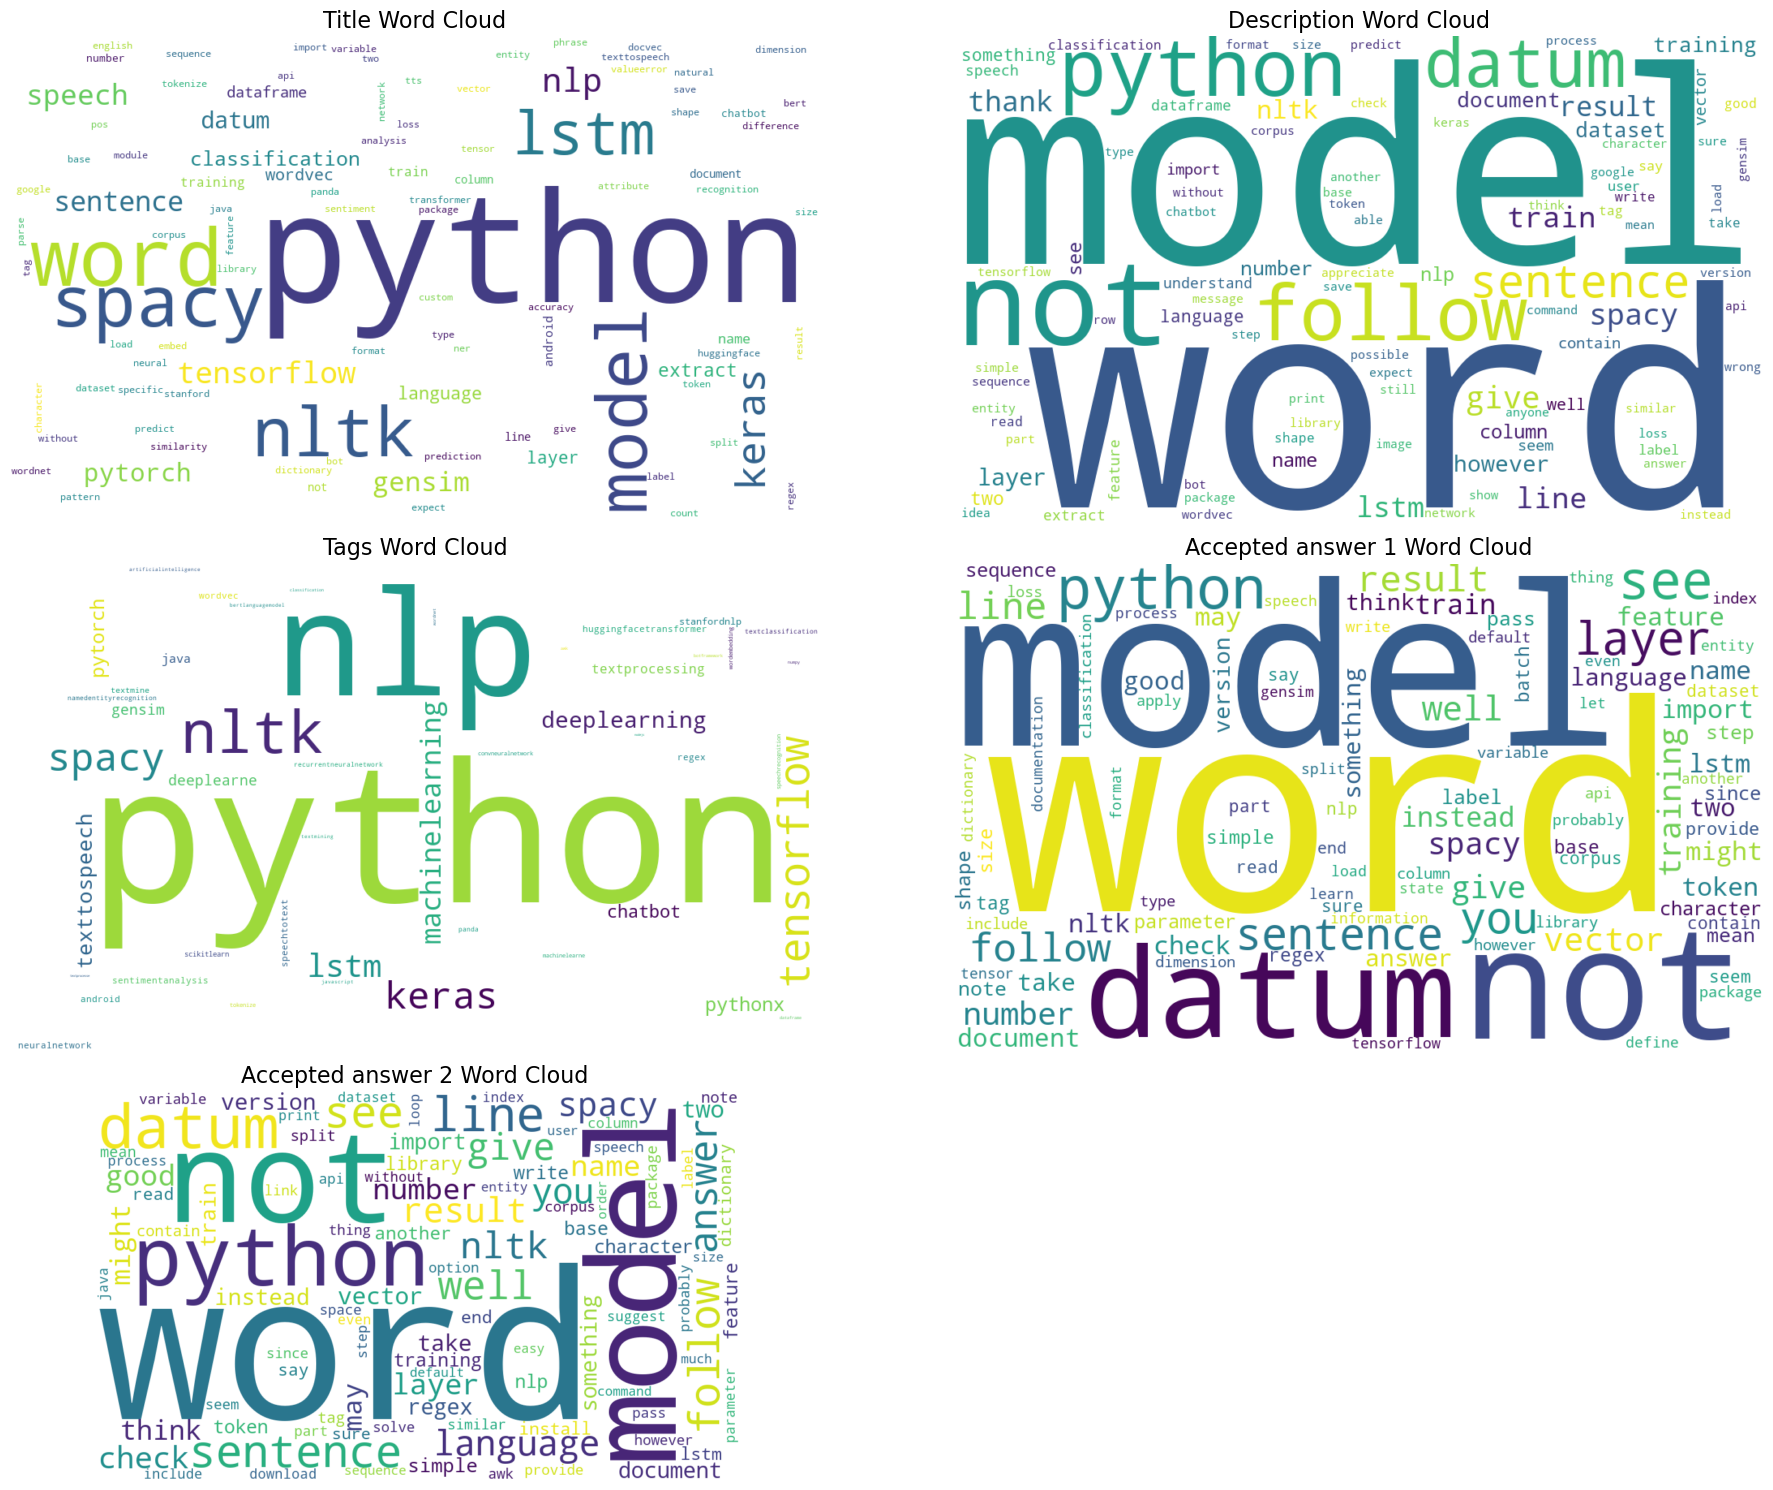

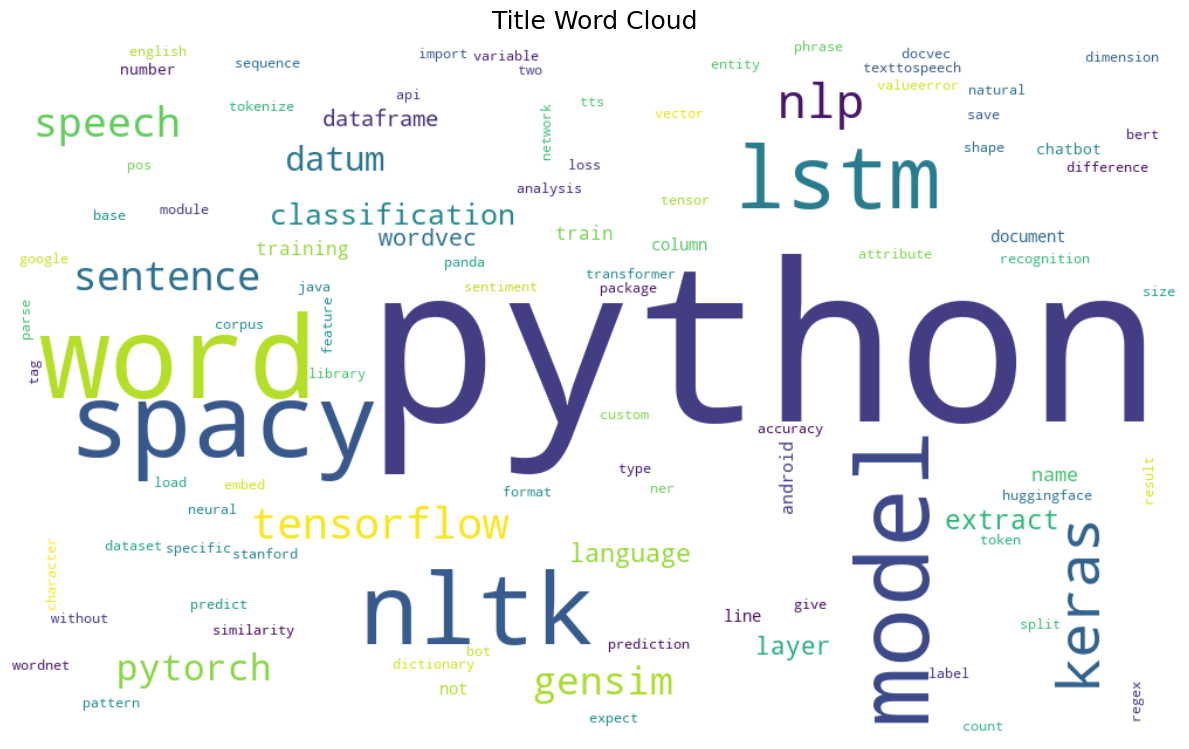

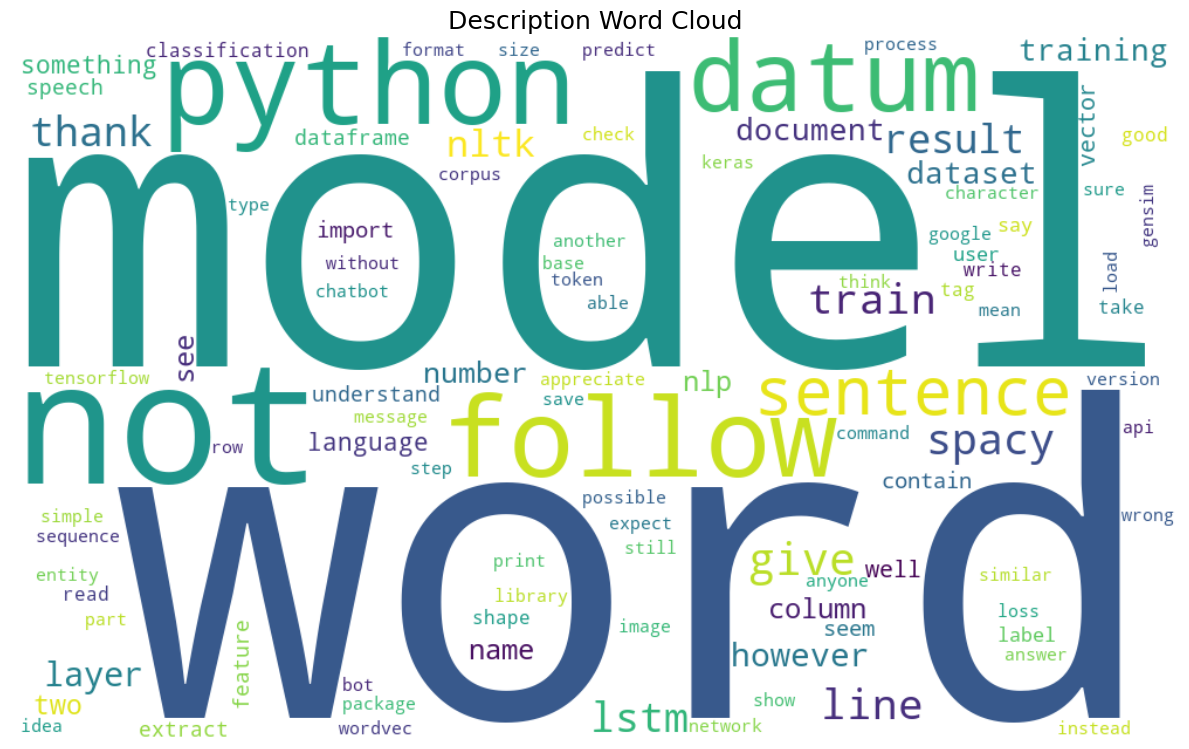

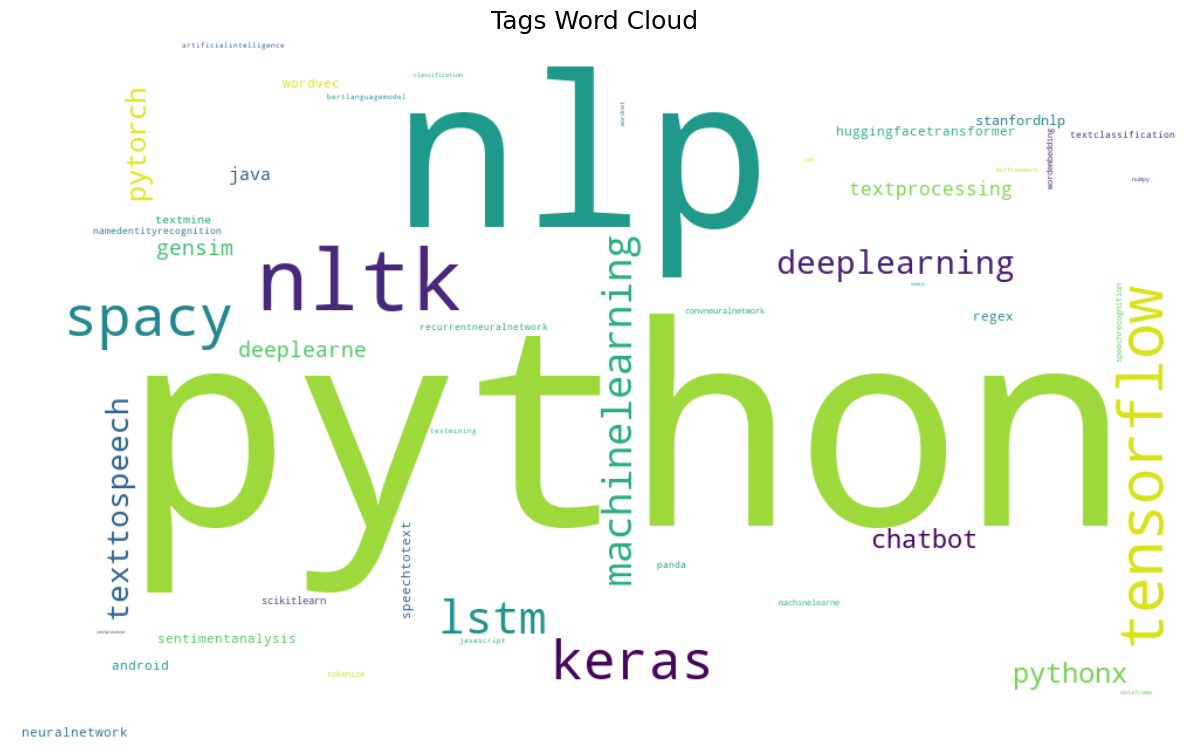

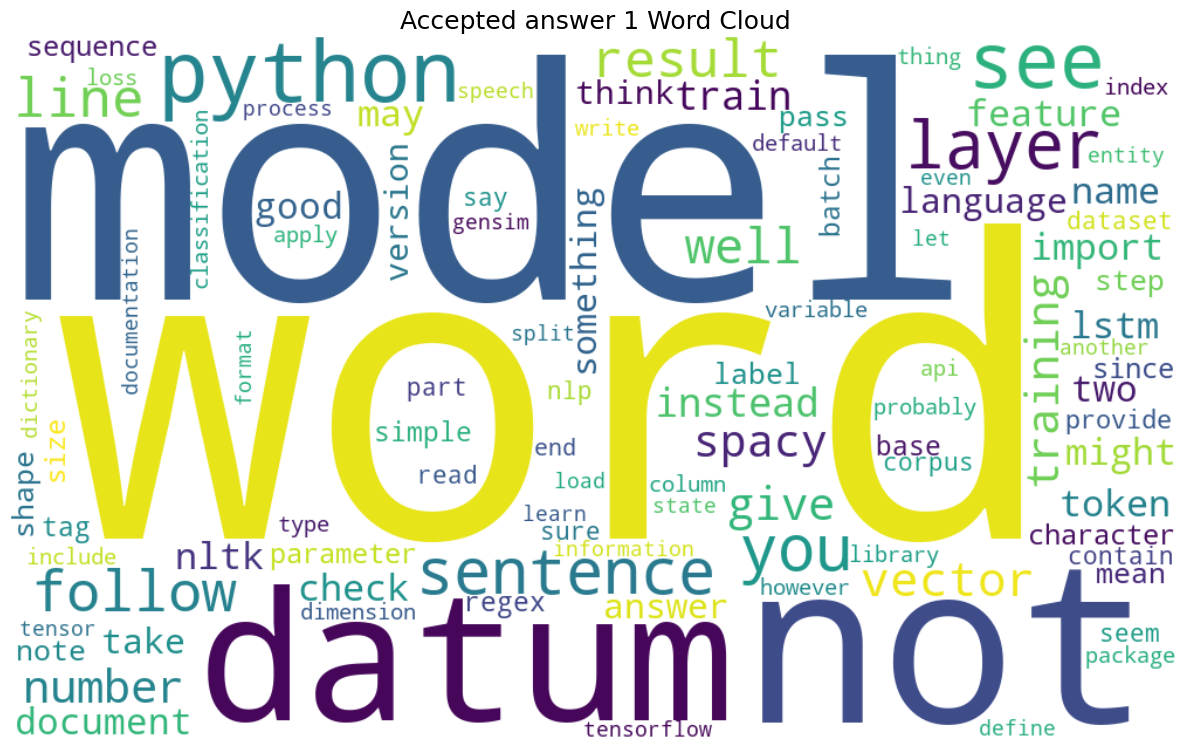

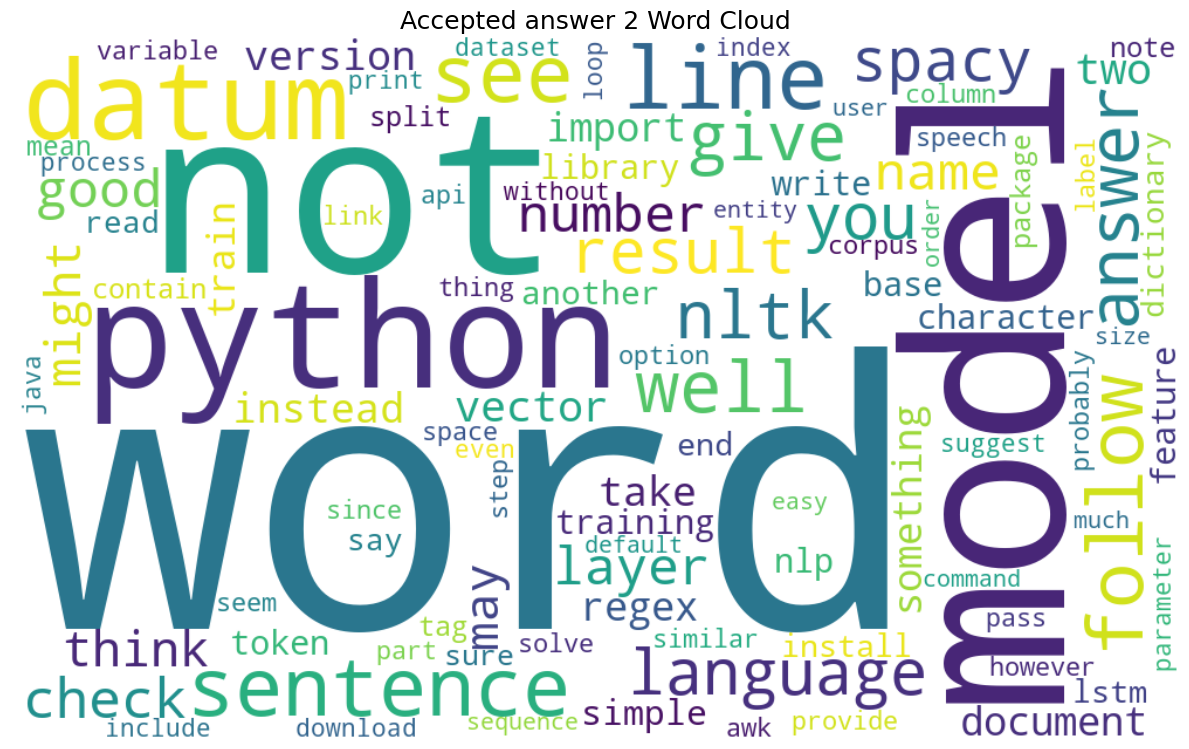

In [217]:
columns = ['title', 'description', 'tags', 'accepted answer 1', 'accepted answer 2']

results = {}
for column in columns:
    print(f"Processing {column}...")
    wordcloud, top_terms = process_column(processed_data, column)
    if wordcloud:
        results[column] = {'wordcloud': wordcloud, 'top_terms': top_terms}
        print(f"Top 10 terms in {column}:")
        for term, score in top_terms[:10]:
            print(f"  {term}: {score:.2f}")


plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.8])

for i, column in enumerate(columns):
    if column in results:
        plt.subplot(gs[i])
        plt.imshow(results[column]['wordcloud'], interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{column.capitalize()} Word Cloud', fontsize=16)

plt.tight_layout()
plt.savefig('nlp_dataset_wordclouds.png', dpi=300)
plt.show()


for column, data in results.items():
    plt.figure(figsize=(12, 8))
    plt.imshow(data['wordcloud'], interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{column.capitalize()} Word Cloud', fontsize=18)
    plt.tight_layout()
    plt.savefig(f'{column.replace(" ", "_")}_wordcloud.png', dpi=300)
    
    # Save top terms to text file
    with open(f'{column.replace(" ", "_")}_top_terms.txt', 'w') as f:
        f.write(f"Top terms in {column}:\n")
        for term, score in data['top_terms']:
            f.write(f"{term}: {score:.2f}\n")

## Step-by-Step Explanation

1. **Lemmatization with spaCy**: The pipeline begins by lemmatizing tokens using spaCy, which handles different word forms better than stemming or basic lemmatization.

2. **Custom Stopword Removal**: Technical and programming-specific stopwords are filtered out after lemmatization to focus on meaningful terms.

3. **N-gram Extraction**: Bigrams are extracted to capture meaningful technical phrases like "machine_learning" or "word_embedding".

4. **TF-IDF Weighting**: Terms are weighted based on their distinctiveness in the corpus, not just their frequency.

5. **Tag Information Leverage**: Terms that appear as tags are given a boost, reflecting their importance in the domain.

6. **Combining Multiple Signals**: The final word cloud weights incorporate:
   - Raw frequency counts (after lemmatization and stopword removal)
   - Bigram importance (weighted higher than unigrams)
   - TF-IDF scores (to highlight distinctive terms)
   - Tag importance (domain expertise)
   - Manually specified boosts for key NLP terms

7. **Word Cloud Generation**: The final visualization uses comprehensive weighting to show truly important terms.

## Advantages of This Approach

1. **More Meaningful Results**: By lemmatizing first, I can group related word forms together, giving a better representation of concept importance.

2. **Cleaner Visualization**: The preprocessing removes programming meta-language and focuses on substantive technical terms.

3. **Technical Context Preserved**: Bigrams capture important technical phrases that would be lost with single-word processing.

4. **Domain Knowledge Integration**: By boosting terms based on tags, I can incorporate subject-matter expertise into the visualization.

5. **Multiple Evidence Sources**: The combination of frequency, TF-IDF, and domain knowledge creates a more robust importance metric.


-------------------------------------
# Insights About the __Title__ column's WordCloud

This word cloud offers valuable insights into the main topics and technologies discussed in the titles of your NLP dataset:

## Dominant Technologies and Frameworks

1. **Python** emerges as the most prominent term, reflecting its status as the primary programming language for NLP applications.

2. **spaCy** appears as one of the largest terms, indicating its popularity as an industrial-strength NLP library.

3. **LSTM** (Long Short-Term Memory) has significant prominence, showing the importance of this neural network architecture in NLP tasks.

4. **NLP** itself is prominently featured, which is expected given the dataset's focus.

5. **TensorFlow** and **PyTorch** both appear, representing the two most popular deep learning frameworks.

6. **NLTK** is clearly visible, showing the continued relevance of this classical NLP library despite newer alternatives.

7. **Gensim** is visible, highlighting its importance for topic modeling and document similarity.

## Key NLP Concepts and Tasks

1. **Word** and **Sentence** are prominent, representing fundamental units of text processing.

2. **Classification** is significant, suggesting many questions involve categorizing text.

3. **Model** indicates a focus on machine learning approaches to NLP.

4. **Language** appears as a medium-sized term, suggesting discussions about multilingual processing or language models.

5. **Extract** points to information extraction as a common task.

6. **Keras** is visible, showing its popularity as a high-level neural network API.

## Technical Details and Components

1. **DataFrame** suggests integration with pandas for data manipulation.

2. **Tokenize** reflects the fundamental NLP preprocessing step.

3. **WordVec** (word vectors/embeddings) shows the importance of word representations.

4. **BERT** is visible, though not as large as expected given its impact on the field, possibly indicating the dataset may not be entirely up-to-date with the latest transformer models.

5. **Training** suggests questions about model development.

## Application Areas

1. **ChatBot** appears, showing interest in conversational AI.

2. **TextToSpeech** is visible, indicating speech synthesis applications.

3. **Sentiment** suggests sentiment analysis is a common task.

4. **NER** (Named Entity Recognition) is present as a specific NLP task.

## Insights About the Community

1. The variety of terms suggests a mix of beginners and more advanced practitioners, with questions ranging from basic (tokenization) to advanced (LSTM implementation).

2. The presence of both traditional tools (NLTK) and modern approaches (BERT, PyTorch) shows a community in transition.

3. The prominence of practical implementation terms (DataFrame, API, Format) suggests a focus on applied NLP rather than theoretical research.

4. The diversity of visible libraries indicates that users are exploring multiple approaches rather than standardizing on a single toolkit.

This word cloud effectively captures the technical ecosystem of NLP as represented in your dataset's titles, highlighting both the core technologies and the typical tasks practitioners are working with.


# __3. Graphical representation of the dataset<a class="anchor" id="third-bullet"></a>__  
[Table of Contents](#toc)   

processed_data